In [1]:
import matplotlib.pyplot as plt
from util_storage import loadObj
import os, json
import numpy as np
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
target_folder = './Minicist_V2/'
target_folder = './Minicist_V5_FASE_2_DENSENET_64x64_UNEQUART_10,15,20,25,30,35,40,45,50,55,60/'
target_folder = 'SGD_remotro'
target_folder = 'SGD_remoto_FASE1'
target_folder = 'SGD_REMOTO_FASE_2_V2'

#target_folder = 'SGD_remoto_FASE2'

target_epoch = '0'

variables = ['f1_score', 'precision', 'recall', 'accuracy', 'auc']

vdict = {}
for variable in variables:
    vdict[variable] = {'x':[],'y':[],'label':[]}

In [3]:
for window_size in os.listdir(target_folder):
    target_json = target_folder + '/{}/'.format(window_size) + target_epoch + '/fold_results'
    data = loadObj(target_json)
    
    # Obtain the stopping point
    validation_values = [x['val']['loss'] for x in data]
    
    idx = np.argmin(validation_values)

    for variable in variables:
        vdict[variable]['label'].append("{}x{}\n({}px)".format(window_size,window_size,int(window_size)*int(window_size)))
        vdict[variable]['x'].append(int(window_size)*int(window_size))
        vdict[variable]['y'].append(data[idx]['test'][variable])
        
for variable in variables:
    vdict[variable]['label'] = [x for _, x in sorted(zip(vdict[variable]['x'], vdict[variable]['label']), key=lambda pair: pair[0])]
    vdict[variable]['y'] = [x for _, x in sorted(zip(vdict[variable]['x'], vdict[variable]['y']), key=lambda pair: pair[0])]
    vdict[variable]['x'] = [x for _, x in sorted(zip(vdict[variable]['x'], vdict[variable]['x']), key=lambda pair: pair[0])]


<ipython-input-4-abe75b84e8c3>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vdict[variable]['label'])


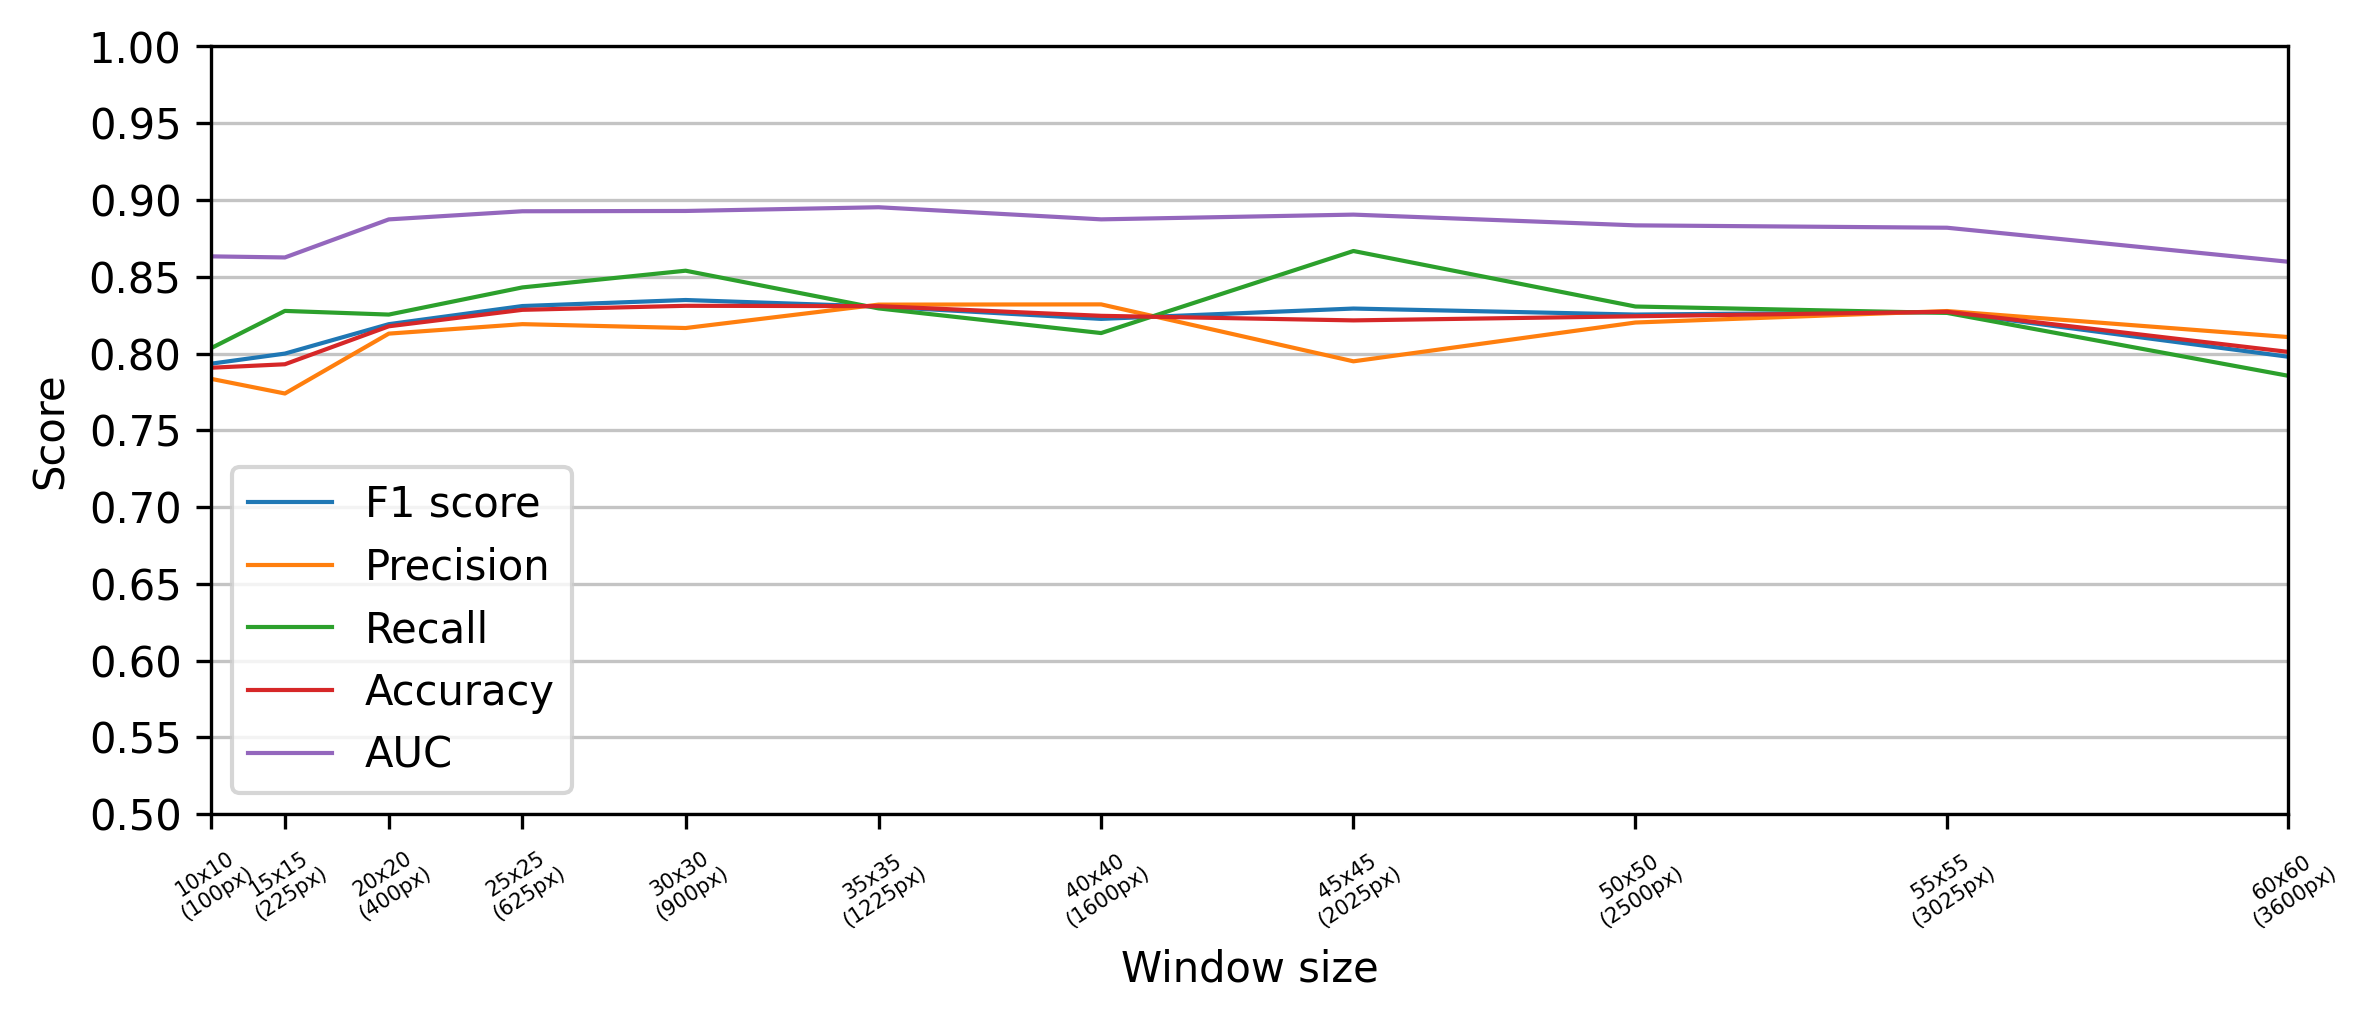

In [4]:


f = figure(figsize=(8, 3.5), dpi=300)
ax = f.gca()
for variable in variables:
    if variable== 'auc':
        ax.plot(vdict[variable]['x'],vdict[variable]['y'],linewidth=1,label=variable.replace('_',' ').upper())
    else:
        ax.plot(vdict[variable]['x'],vdict[variable]['y'],linewidth=1,label=variable.replace('_',' ').capitalize())
    ax.set_xticklabels(vdict[variable]['label'])
    plt.xticks(vdict[variable]['x'],rotation=33, fontsize=5)
    ax.set_xlim(min(vdict[variable]['x']),max(vdict[variable]['x']))

ax.legend()
ax.set_xlabel('Window size')
ax.set_ylabel('Score')
ax.set_ylim([0.5, 1])
ax.set_yticks(np.arange(0.5, 1.02, 0.05))
ax.grid(which='both',alpha=0.75,axis='y')
plt.tight_layout()
f.savefig('secondablation.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=True, bbox_inches=None, pad_inches=0,
        metadata=None)
plt.show()

